# 安裝 selenium

In [ ]:
! pip install selenium

# import套件

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options

import re
import math
import pandas as pd

from datetime import datetime

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.font_manager import FontProperties



# 執行webdriver

In [ ]:
#headless模式
#options = webdriver.ChromeOptions()
#options.add_argument('--headless')
#driver = webdriver.Chrome(options=options, executable_path='chromedriver.exe')
#driver = webdriver.Chrome(executable_path='chromedriver.exe')

options = Options()
options.headless = True
#driver = webdriver.Firefox(options=options, executable_path=driverPath)

driverPath = '/media/shawn-pc/3T/code/python_FBrobot臉書機器人/geckodriver'
driver = webdriver.Firefox(executable_path=driverPath)

url='https://www.facebook.com'
driver.get(url)

In [29]:
url='https://www.facebook.com/zuck'
driver.get(url)

# 開始抓取

In [30]:
#網址上的名稱
userid = driver.current_url
print(userid)
if 'profile' in userid:
    userid = userid.split('id=',1)
    userid = userid[1]
else:
    userid = userid.split('https://www.facebook.com/', 1 )
    userid = userid[1].split('?', 1 )
    userid = userid[0]

print(userid)



https://www.facebook.com/zuck
zuck


In [31]:
#名稱
htmltext = driver.page_source
soup = BeautifulSoup(htmltext,"lxml")
username = soup.find('a','_2nlw _2nlv')
username = username.text
username = username.split('(',1)
username = username[0]

#去除空白
username = username.split(' ',1)
username = username[0]
print(username)



Mark


In [32]:
#抓取100篇貼文
htmltext = driver.page_source
soup = BeautifulSoup(htmltext,"lxml")
postList = soup.find('div','_1dwg _1w_m _q7o')


js = 'window.scrollTo(0, document.body.scrollHeight)'
    
postList = soup.find_all('div','_1dwg _1w_m _q7o')
postN = len(postList)
print(postN)
while postN < 50 :
    driver.execute_script(js)
    htmltext = driver.page_source
    soup = BeautifulSoup(htmltext,"lxml")
    postList = soup.find_all('div','_1dwg _1w_m _q7o')
    postN = len(postList)
    print(postN)
    
for post in postList:
    print(post.text)

6
6
6
7
8
10
11
14
14
14
15
18
18
18
19
22
22
22
23
26
26
27
30
33
34
35
38
42
46
49
50
Mark Zuckerberg10月31日下午8:10 · Happy Halloween from our garden! 🎃 (I'm a drop of water. That's what happens when your three year old picks the theme.)來自我們花園的萬聖節快樂! 🎃 🎃 (我是一滴水). 當你三歲的時候選擇主題時, 就會發生這種情況. 年十二月 · 查看原文 · 為此翻譯評分
Mark Zuckerberg10月31日下午5:12 · Today at Q&A... 🎃今天在q & a... 🎃 · 查看原文 · 為此翻譯評分
Mark Zuckerberg10月31日上午11:29 · "America isn't easy. America is advanced citizenship. You gotta want it bad, 'cause it's gonna put up a fight. It's gonna say: You want free speech? Let's see you acknowledge a man whose words make your blood boil, who's standing center stage and advocating at the top of his lungs that which you would spend a lifetime opposing at the top of yours. You want to claim this land as the land of the free? Then the symbol of your country can't just be a flag; the symbol also has to be one of its citizens exercising his right to burn that flag in protest. Show me that, defend that, ce

In [33]:
#印出貼文
df = pd.DataFrame(columns=['type','utime','content','url'])
for post in postList:
    utime = post.find('abbr','_5ptz').get('data-utime')
    content = post.find('div','_5pbx userContent _3576')
    url = post.find('a','_5pcq').get('href')
    if content is not None:
        content = content.text
    #utime = datatime.get('data-utime')
    #timeList.append(utime)
    #print(utime)
    #print(postContent)
    df = df.append({
    'type':'post',
    'utime' :utime ,
    'content' : content,
    'url':url,
} , ignore_index=True)

In [34]:
df

,type,utime,content,url
0,post,1572577836,Happy Halloween from our garden! 🎃 (I'm a drop...,https://www.facebook.com/photo.php?fbid=101102...
1,post,1572567171,Today at Q&A... 🎃今天在q & a... 🎃 · 查看原文 · 為此翻譯評分,https://www.facebook.com/photo.php?fbid=101102...
2,post,1572546541,None,/zuck/posts/10110290602526841
3,post,1572470589,None,/zuck/posts/10110264733792991
4,post,1572023249,Live talking about journalism and the launch o...,/zuck/videos/10109952468829481/
5,post,1572000226,I've been talking to news publishers and journ...,/zuck/videos/10109947748174711/
6,post,1571761031,None,/zuck/posts/10109900954369871
7,post,1571755314,Here's the extended video of my interview with...,/zuck/posts/10109900083924251
8,post,1571708029,The 2020 US elections are almost a year away. ...,/zuck/posts/10109887266784901?__xts__%5B0%5D=6...
9,post,1571339444,None,/notes/mark-zuckerberg/standing-for-voice-and-...


In [ ]:
#點開所有其他回應

while len(driver.find_elements_by_class_name('_4ssp')) > 10:
    clickN = driver.find_elements_by_class_name('_4ssp')
    print(len(clickN))
    for i in range(len(clickN)):
        clickN[i].click()

In [35]:
#抓取回應
htmltext = driver.page_source
soup = BeautifulSoup(htmltext,"lxml")
replys = soup.find_all('div','_4eek')
for reply in replys:
    userReplys = reply.find_all('a','_6qw4')
    for userReply in userReplys:
        if userReply.get('href') == '/'+userid:
            utime = reply.find('abbr','livetimestamp').get('data-utime')
            
            content = reply.find('span','_3l3x')
            if content is not None:
                content = content.text

            df = df.append({
            'type':'reply',
            'utime' :utime ,
            'content' : content,
            'url':''
            } , ignore_index=True)


In [36]:
df

,type,utime,content,url
0,post,1572577836,Happy Halloween from our garden! 🎃 (I'm a drop...,https://www.facebook.com/photo.php?fbid=101102...
1,post,1572567171,Today at Q&A... 🎃今天在q & a... 🎃 · 查看原文 · 為此翻譯評分,https://www.facebook.com/photo.php?fbid=101102...
2,post,1572546541,None,/zuck/posts/10110290602526841
3,post,1572470589,None,/zuck/posts/10110264733792991
4,post,1572023249,Live talking about journalism and the launch o...,/zuck/videos/10109952468829481/
5,post,1572000226,I've been talking to news publishers and journ...,/zuck/videos/10109947748174711/
6,post,1571761031,None,/zuck/posts/10109900954369871
7,post,1571755314,Here's the extended video of my interview with...,/zuck/posts/10109900083924251
8,post,1571708029,The 2020 US elections are almost a year away. ...,/zuck/posts/10109887266784901?__xts__%5B0%5D=6...
9,post,1571339444,None,/notes/mark-zuckerberg/standing-for-voice-and-...


In [37]:
pd.to_datetime(df['utime'],unit='s')

0    2019-11-01 03:10:36
1    2019-11-01 00:12:51
2    2019-10-31 18:29:01
3    2019-10-30 21:23:09
4    2019-10-25 17:07:29
5    2019-10-25 10:43:46
6    2019-10-22 16:17:11
7    2019-10-22 14:41:54
8    2019-10-22 01:33:49
9    2019-10-17 19:10:44
10   2019-10-17 17:06:14
11   2019-10-16 18:17:02
12   2019-10-14 19:38:49
13   2019-10-10 17:07:22
14   2019-10-03 23:00:29
15   2019-10-03 22:45:21
16   2019-10-01 15:44:27
17   2019-09-30 02:05:14
18   2019-09-26 18:29:54
19   2019-09-25 17:52:31
20   2019-09-25 17:01:29
21   2019-09-25 00:56:11
22   2019-09-19 11:55:26
23   2019-09-18 12:00:16
24   2019-09-17 20:01:08
25   2019-09-05 13:58:18
26   2019-08-18 17:52:38
27   2019-07-24 21:24:04
28   2019-07-24 12:47:26
29   2019-07-16 18:41:31
30   2019-07-11 22:49:34
31   2019-07-08 02:41:36
32   2019-07-04 22:21:42
33   2019-06-27 13:53:47
34   2019-06-26 21:09:16
35   2019-06-18 09:12:35
36   2019-06-16 16:48:57
37   2019-06-10 03:22:56
38   2019-06-05 02:44:13
39   2019-05-22 05:12:15


In [38]:
#取得貼文時間

#df['time'] = pd.to_datetime(df['utime'],unit='s')+pd.Timedelta('08:00:00')
df['time'] = pd.to_datetime(df['utime'],unit='s')-pd.Timedelta('07:00:00')


In [39]:
#取得發文的weekday
df['weekdays'] = df['time'].dt.day_name()
df['dayofweeks'] = df['time'].dt.dayofweek
# Monday=0, Sunday=6.
df['hours'] = df['time'].dt.hour

df

,type,utime,content,url,time,weekdays,dayofweeks,hours
0,post,1572577836,Happy Halloween from our garden! 🎃 (I'm a drop...,https://www.facebook.com/photo.php?fbid=101102...,2019-10-31 20:10:36,Thursday,3,20
1,post,1572567171,Today at Q&A... 🎃今天在q & a... 🎃 · 查看原文 · 為此翻譯評分,https://www.facebook.com/photo.php?fbid=101102...,2019-10-31 17:12:51,Thursday,3,17
2,post,1572546541,None,/zuck/posts/10110290602526841,2019-10-31 11:29:01,Thursday,3,11
3,post,1572470589,None,/zuck/posts/10110264733792991,2019-10-30 14:23:09,Wednesday,2,14
4,post,1572023249,Live talking about journalism and the launch o...,/zuck/videos/10109952468829481/,2019-10-25 10:07:29,Friday,4,10
5,post,1572000226,I've been talking to news publishers and journ...,/zuck/videos/10109947748174711/,2019-10-25 03:43:46,Friday,4,3
6,post,1571761031,None,/zuck/posts/10109900954369871,2019-10-22 09:17:11,Tuesday,1,9
7,post,1571755314,Here's the extended video of my interview with...,/zuck/posts/10109900083924251,2019-10-22 07:41:54,Tuesday,1,7
8,post,1571708029,The 2020 US elections are almost a year away. ...,/zuck/posts/10109887266784901?__xts__%5B0%5D=6...,2019-10-21 18:33:49,Monday,0,18
9,post,1571339444,None,/notes/mark-zuckerberg/standing-for-voice-and-...,2019-10-17 12:10:44,Thursday,3,12


In [40]:
#將發文時間轉pivot table
#df.groupby(["weekdays", "hours"]).size()
piv = df.groupby(['dayofweeks', 'hours']).size().reset_index(name='freq')
#piv = pd.pivot_table(piv, values="freq",index=["weekdays"], columns=["hours"], fill_value=0)
piv = pd.pivot_table(piv, values='freq',index='dayofweeks', columns='hours', fill_value=0)
#piv =piv.reset_index(drop=False)

piv

hours,2,3,4,5,6,7,8,9,10,11,...,13,14,15,16,17,18,19,20,21,22
dayofweeks,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,1,1,1,1,2,...,1,0,0,0,1,0,1,2,1,2
2,0,0,0,2,0,0,0,0,2,1,...,0,4,0,0,0,0,0,0,0,0
3,0,0,1,0,2,0,0,0,2,2,...,0,0,3,1,1,0,0,2,0,0
4,1,1,0,1,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,2,1,0,0


In [41]:
#補上缺少的時間資料
for i in range(24):
    if i not in piv.columns:
        piv[i] = 0
#print(piv.index)
piv = piv.reindex(sorted(piv.columns), axis=1)
piv

hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweeks,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,0,1,0,0,0,0,1,1,1,...,0,0,0,1,0,1,2,1,2,0
2,0,0,0,0,0,2,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,2,0,0,0,...,0,3,1,1,0,0,2,0,0,0
4,0,0,1,1,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,2,1,0,0,0


## interpolation method
## https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html
## https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
## https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


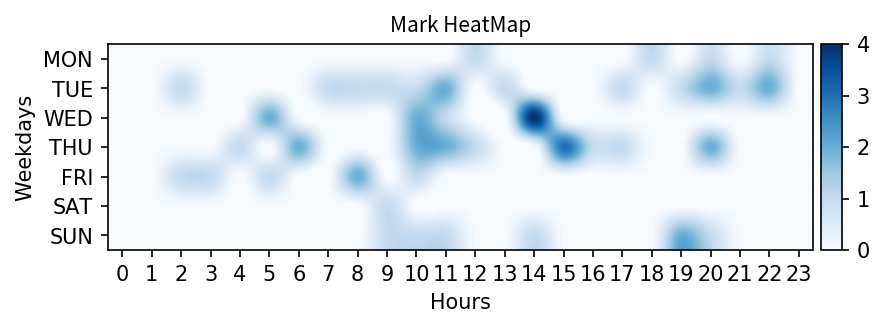

In [42]:

#myfont = FontProperties(fname=r'msjh.ttf')
myfont = FontProperties(fname=r'NotoSansCJK-Regular.ttc')
 

fig, ax = plt.subplots(figsize=(6, 5), dpi=150)

im = ax.imshow(piv, cmap="Blues", interpolation='catrom')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
fig.colorbar(im,  cax=cax)

ax.set_xticks(range(len(piv.columns)))
ax.set_yticks(range(len(piv.index)))
#ax.set_xticklabels(piv.columns,rotation=90)
ax.set_xticklabels(piv.columns)
#ax.set_yticklabels(piv.index)
names= (['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
ax.set_yticklabels(names)
ax.set_xlabel("Hours")
ax.set_ylabel("Weekdays")
ax.set_title(username +' HeatMap',fontproperties=myfont)
plt.tight_layout()
plt.savefig(userid+'.png')
plt.show()